# Detect Events

## Outline

### Questions
- How do I find the events (change points) in a signal?
- What is the event detection algorithm generally recommended in **dupin**?

### Objectives
- Demonstrate using a linear cost function with **ruptures** for event detection.
- Show how to use the `SweepDetector` class to find the events and correct number of change points.

# Import

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import ruptures as rpt

import dupin as du

FILENAME = "lj-filtered-data.h5"
plt.style.use("seaborn-v0_8-bright")
mpl.rcParams.update(
    {
        "lines.linewidth": 2.0,
        "axes.labelsize": 20.0,
        "axes.titlesize": 20.0,
    }
)

%matplotlib inline

## Define Plotting Functions

These functions are not general purpose but used to show the detection at the end of the tutorial.

In [2]:
def plot_costs(detector, fig):
    ax = fig.add_subplot()
    ax.plot(sweep_detector.costs_)
    min_ = min(sweep_detector.costs_)
    max_ = max(sweep_detector.costs_)
    ax.axvline(sweep_detector.opt_n_change_points_, color="k", linestyle="--")
    ax.set_xlabel("$N_{CP}$")
    ax.set_ylabel("Cost")


def plot_signal(data, detector, fig):
    end_with_strs = ["2}$", "4}$", "6}$", "8}$", "10}$"]
    n_rows = 2
    n_cols = 3
    gridspec = mpl.gridspec.GridSpec(
        n_rows,
        n_cols,
    )
    for i, end_str in enumerate(end_with_strs):
        ax = fig.add_subplot(gridspec[i // n_cols, i % n_cols])
        df = data.filter(
            [c for c in data.columns if c.endswith(end_str)], axis="columns"
        )
        df.plot(
            ax=ax, legend=False, title="_".join(df.columns[0].split("_")[-2:])
        )
        ax.title.set_size(20)
        for cp in sweep_detector.opt_change_points_:
            ax.axvline(cp, linestyle="--")

# Load Data

We load the data from the previous section.

In [3]:
data = pd.read_hdf(FILENAME, "data")

# Linear Cost Function

For general event detection we recommend the `dupin.detect.CostLinearFit` cost function for use in a [ruptures](https://centre-borelli.github.io/ruptures-docs/) detector.
The linear cost function scales each feature to the unit square and then fits a line over the subset of the signal for each feature independently.
The badness of fit then serves as the cost function, by default the Mean Squared Error.
Below we create a `ruptures.Dynp` detector using our cost function.


In [4]:
lin_regress_cost = du.detect.CostLinearFit()
dynp = rpt.Dynp(custom_cost=lin_regress_cost)

# Sweep Detector

**rupture** detectors require either a cost cap or a number of change points to detect events.
This means that we either *a priori* need to know the number of change points or an appropriate penalty.
Generally, we don't know this, so we use `dupin.detect.SweepDetector` to detect the best $N$ change points for $N \in \{1, 2, ..., N_{max}\}$ for some max number of change points.
Then we detect the elbow in the costs over number of change points.
This then is the number of detected change points.
Below we use `SweepDetector` to detect the events in the signal.

In [5]:
sweep_detector = du.detect.SweepDetector(dynp, max_change_points=6)
change_points = sweep_detector.fit(data)
print(f"Optimal change points: {change_points}")

Optimal change points: [15]


# Plot Data

We have now detected our first event!
Below we plot the cost over number of change points and the signal with the change point shown. 

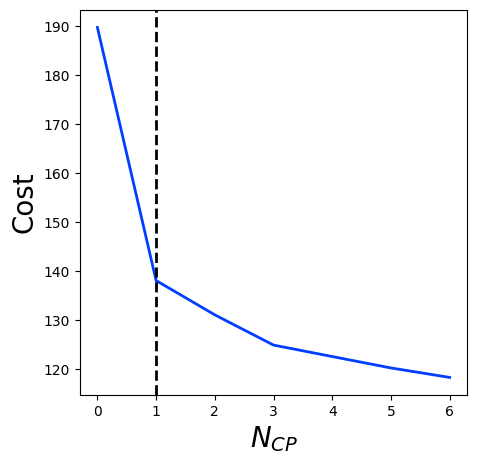

In [6]:
fig = plt.Figure(figsize=(5, 5))
plot_costs(sweep_detector, fig)
fig

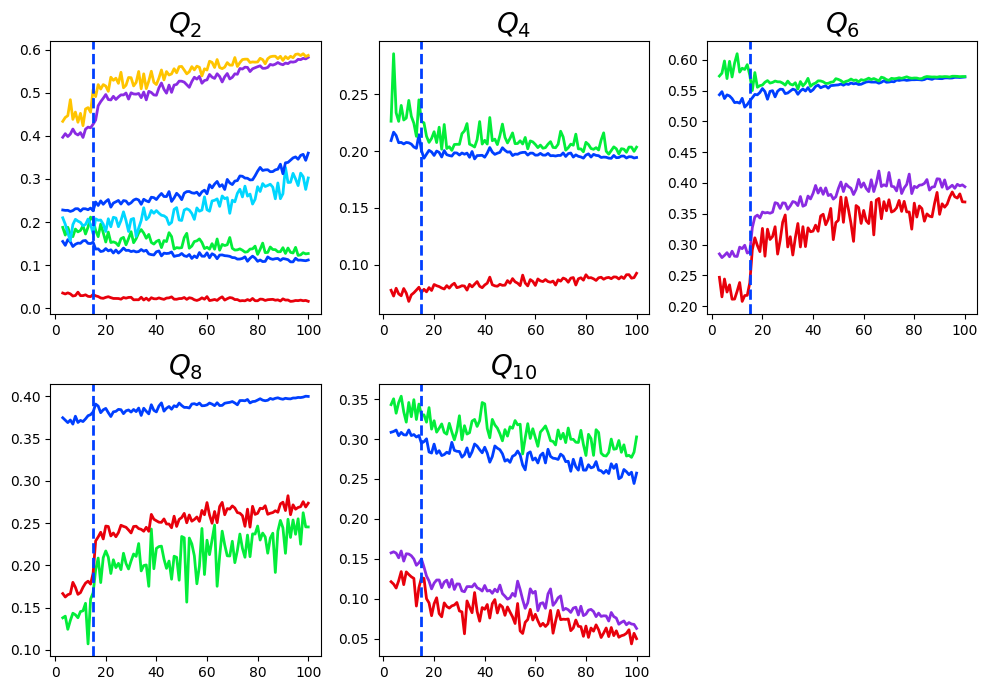

In [7]:
fig = plt.Figure(figsize=(10, 7))
plot_signal(data, sweep_detector, fig)
fig.tight_layout()
fig

This tutorial is now complete.
See the API documentation for further questions.